# Geely Auto Upgrad IIIT Assignment

### Problem Statement:
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

 - Which variables are significant in predicting the price of a car
 - How well those variables describe the price of a car
 
### Business Goal:
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

### Author:
Abhishek Ravindrakumar Maurya

### Steps followed:

We will be following the steps in below order,
   - Data Cleaning
   - Data Understanding
   - Data Preparation
   - Model Building
   - Model Evaluation
   - Conclusion
   
These steps will also be the checkpoints in the below code.

### Data dictionary
Let's mention the data dictionary here along with the type of the variable so that it is easier for our analysis.
<table>
<tr><td>	Car_ID	</td><td>	Unique id of each observation 	</td><td>	Interger	</td></tr>
<tr><td>	Symboling 	</td><td>	Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.	</td><td>	Categorical	</td></tr>
<tr><td>	carCompany	</td><td>	Name of car company 	</td><td>	Categorical	</td></tr>
<tr><td>	fueltype	</td><td>	Car fuel type i.e gas or diesel 	</td><td>	Categorical	</td></tr>
<tr><td>	aspiration	</td><td>	Aspiration used in a car 	</td><td>	Categorical	</td></tr>
<tr><td>	doornumber	</td><td>	Number of doors in a car 	</td><td>	Categorical	</td></tr>
<tr><td>	carbody	</td><td>	body of car 	</td><td>	Categorical	</td></tr>
<tr><td>	drivewheel	</td><td>	type of drive wheel 	</td><td>	Categorical	</td></tr>
<tr><td>	enginelocation	</td><td>	Location of car engine 	</td><td>	Categorical	</td></tr>
<tr><td>	wheelbase	</td><td>	Weelbase of car 	</td><td>	Numeric	</td></tr>
<tr><td>	carlength	</td><td>	Length of car 	</td><td>	Numeric	</td></tr>
<tr><td>	carwidth	</td><td>	Width of car 	</td><td>	Numeric	</td></tr>
<tr><td>	carheight	</td><td>	height of car 	</td><td>	Numeric	</td></tr>
<tr><td>	curbweight	</td><td>	The weight of a car without occupants or baggage. 	</td><td>	Numeric	</td></tr>
<tr><td>	enginetype	</td><td>	Type of engine. 	</td><td>	Categorical	</td></tr>
<tr><td>	cylindernumber	</td><td>	cylinder placed in the car 	</td><td>	Categorical	</td></tr>
<tr><td>	enginesize	</td><td>	Size of car 	</td><td>	Numeric	</td></tr>
<tr><td>	fuelsystem	</td><td>	Fuel system of car 	</td><td>	Categorical	</td></tr>
<tr><td>	boreratio	</td><td>	Boreratio of car 	</td><td>	Numeric	</td></tr>
<tr><td>	stroke	</td><td>	Stroke or volume inside the engine 	</td><td>	Numeric	</td></tr>
<tr><td>	compressionratio	</td><td>	compression ratio of car 	</td><td>	Numeric	</td></tr>
<tr><td>	horsepower	</td><td>	Horsepower 	</td><td>	Numeric	</td></tr>
<tr><td>	peakrpm	</td><td>	car peak rpm 	</td><td>	Numeric	</td></tr>
<tr><td>	citympg	</td><td>	Mileage in city 	</td><td>	Numeric	</td></tr>
<tr><td>	highwaympg	</td><td>	Mileage on highway 	</td><td>	Numeric	</td></tr>
<tr><td>	price(Dependent variable)	</td><td>	Price of car 	</td><td>	Numeric	</td></tr>
</table>

### 1. Data Cleaning

In [1]:
# Before importing all the libraries, adding code to remove any warnings which will be displayed while coding
import warnings
warnings.filterwarnings('ignore')

In [88]:
# import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Below packages are for linear regression
# Keeping the imports separate as it is easier to manage them this way

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
# Let's read the dataset and check few rows of the data
car_data = pd.read_csv('CarPrice_Assignment.csv')
# Check the head of the dataset
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#Let's get the shape of the data
car_data.shape

(205, 26)

In [5]:
#Getting the summary statistics of the data
car_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [7]:
#Before we move on ahead, let's get the percentage of the null values in each column
round(car_data.isnull().sum()*100/len(car_data.index), 2)

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

As we can see from the above code output, there are no null values in any of the columns.

In [8]:
#We won't be needing car_id for our analysis. Let's drop it.
car_data.drop('car_ID',axis=1,inplace=True)
car_data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Variable 'CarName' is of the format CompanyName [space] Model. We need to split the CarName by space so that we can analyze them separately. We will divide the column CarName into CompanyName and then drop the original column.

In [9]:
#Below is the code for splitting the column CarName into two variables by space delimiter
car_data['CompanyName'] = car_data['CarName'].str.split().str[0]

#Now let's drop the CarName variable
car_data.drop('CarName', axis = 1, inplace = True)

car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [10]:
#Checking the unique values in the CompanyName column
car_data['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

We are seeing lot of discrepency in the data. If observed closely, you'll see that there are spelling mistakes, abbrevations used, difference cases used.
Below changes need to be made in the data,
 - alfa-romero - alfa Romeo
 - maxda - mazda
 - nissan - nissan
 - porcshce - porsche
 - toyouta - toyota
 - vokswagen,vw - volkswagen

We will be using the lowercase in this column so will convert all the characters in the column to lower just in case.

In [11]:
#Converting everything under the column CompanyName to lowercase
car_data['CompanyName'] = car_data['CompanyName'].str.lower()

#Replacing the above incorrect values to correct values
car_data['CompanyName'] = car_data['CompanyName'].replace(['alfa-romero'], 'alfa-romeo')
car_data['CompanyName'] = car_data['CompanyName'].replace(['maxda', 'Mazda'], 'mazda')
car_data['CompanyName'] = car_data['CompanyName'].replace(['Nissan'], 'nissan')
car_data['CompanyName'] = car_data['CompanyName'].replace(['porcshce'], 'porsche')
car_data['CompanyName'] = car_data['CompanyName'].replace(['toyouta'], 'toyota')
car_data['CompanyName'] = car_data['CompanyName'].replace(['vokswagen', 'vw'], 'volkswagen')

#Checking the unique values again to make sure if the values are replaced correctly
car_data['CompanyName'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Spelling mistake rectified, everything is lowercase! And with that we have cleaned the data. 

### 2. Data Understanding

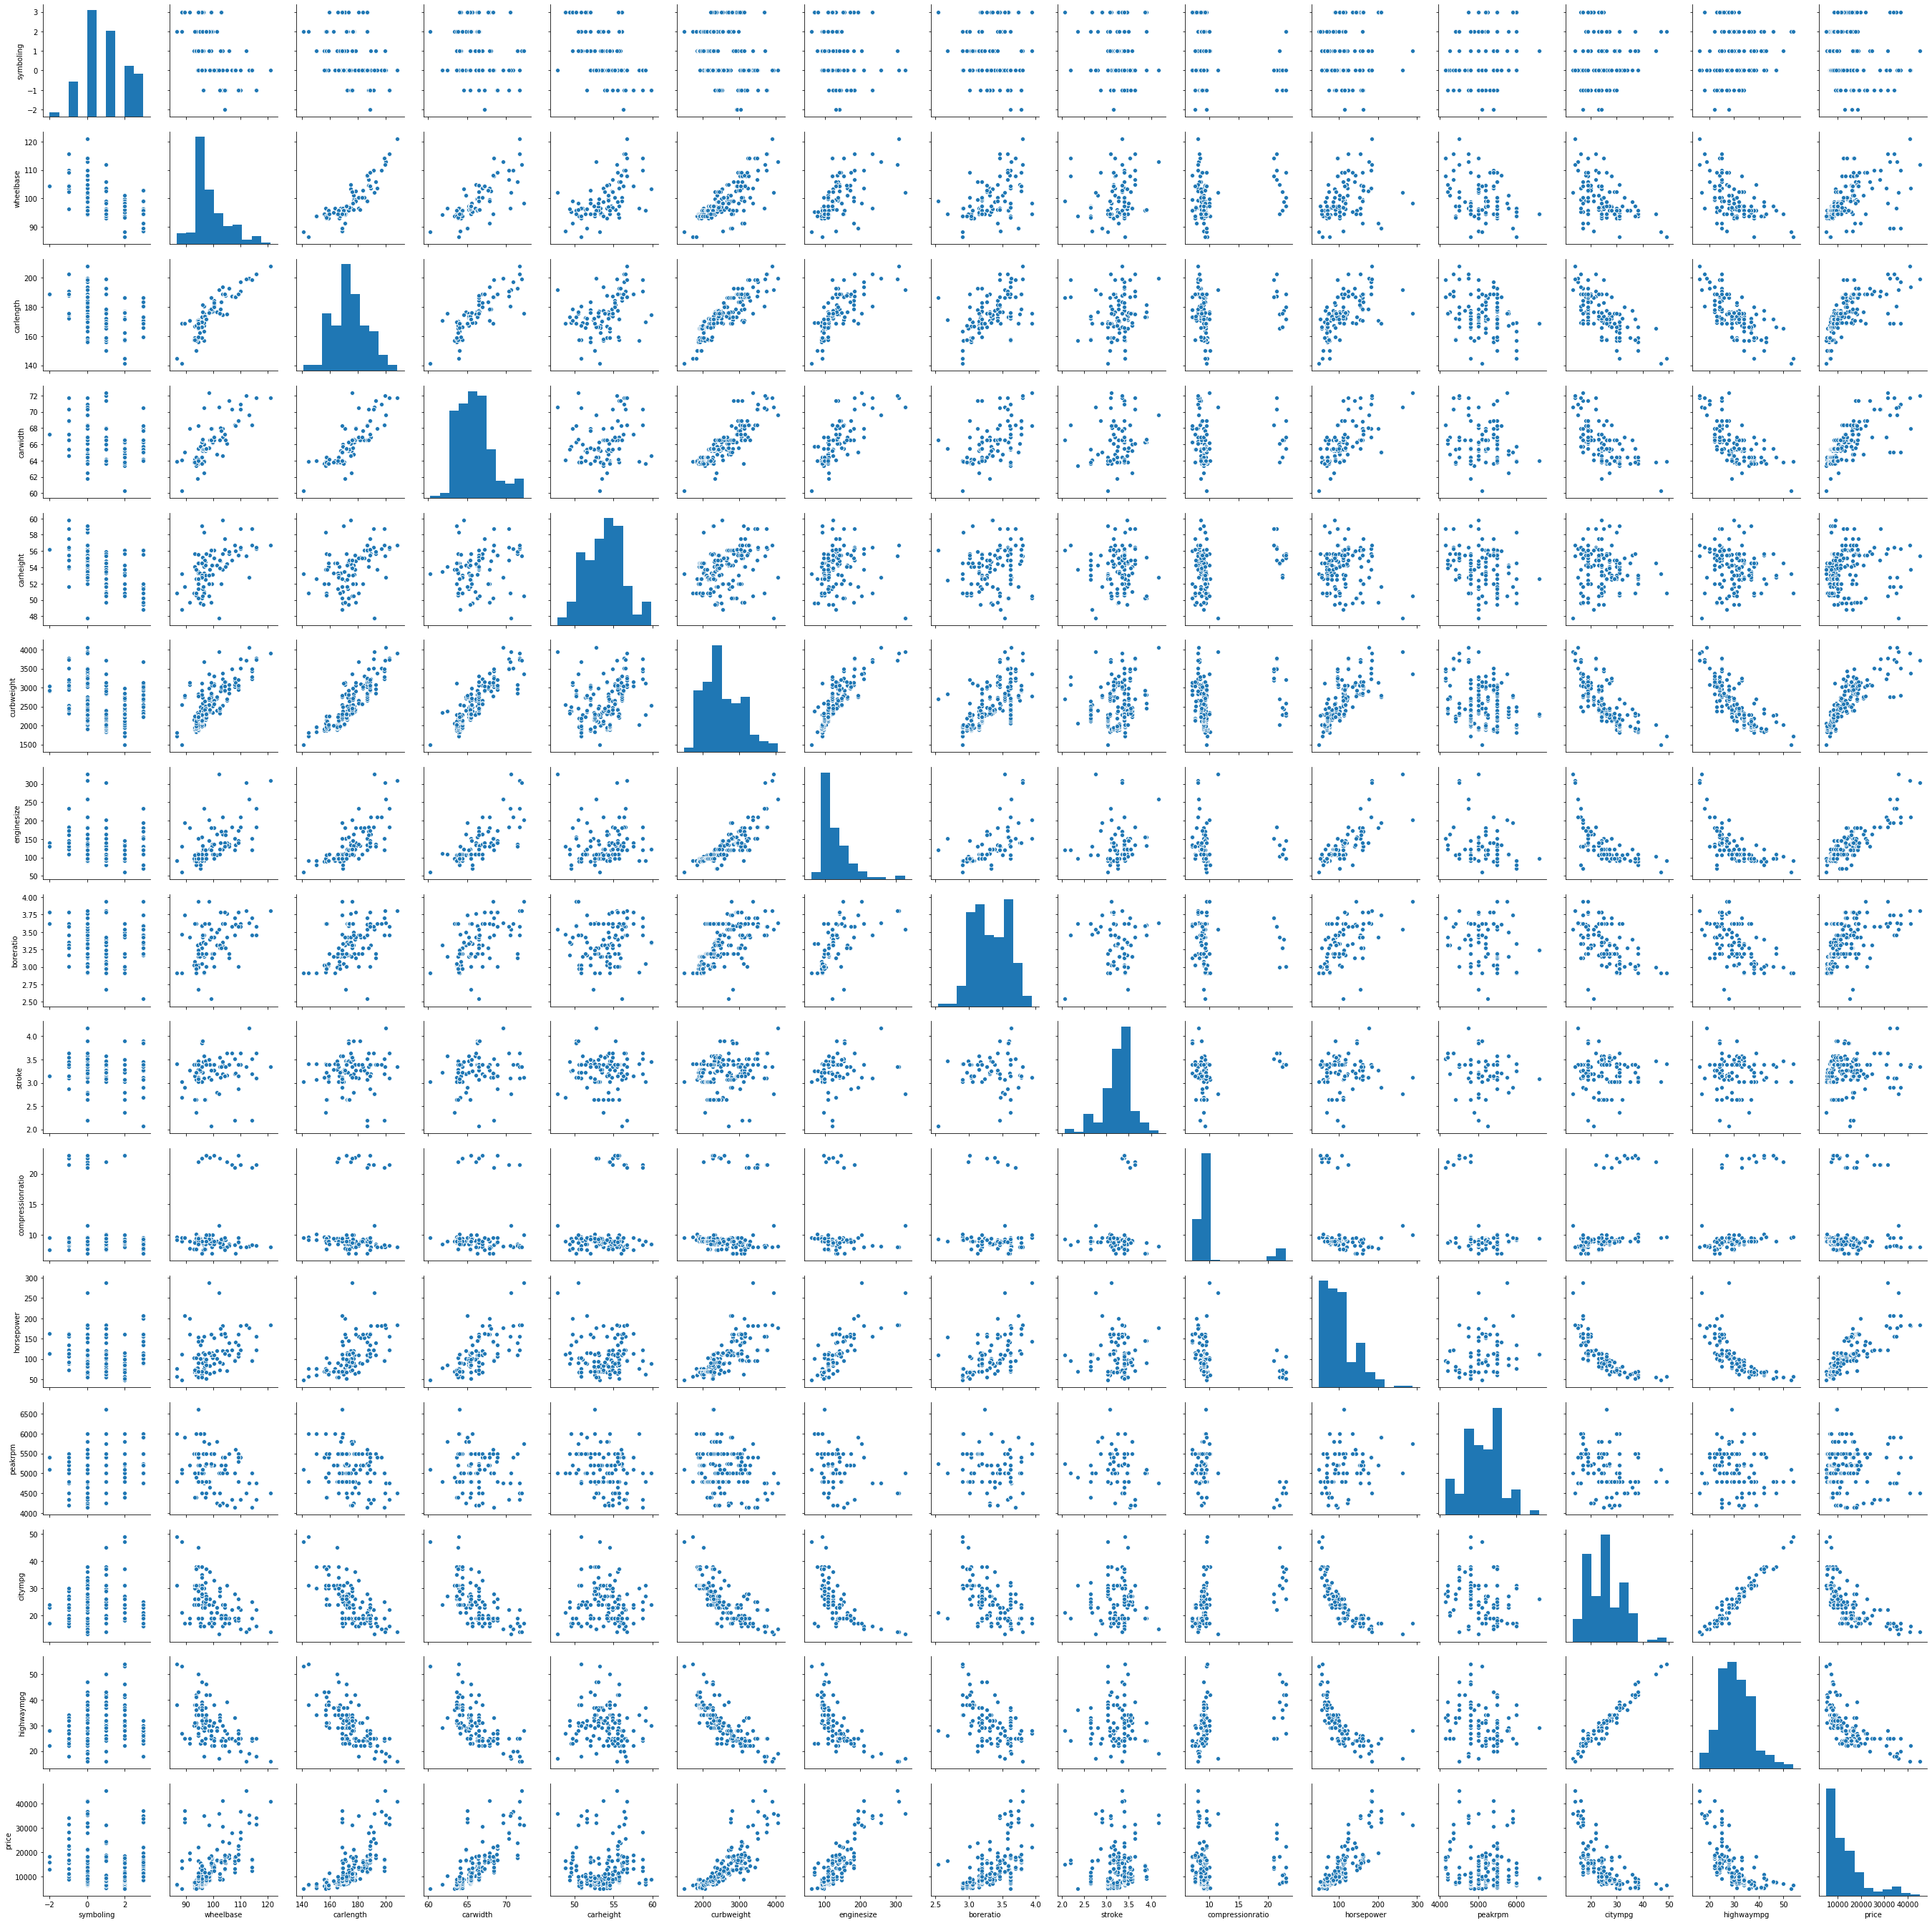

In [12]:
#Let's visualize the dataset by plotting a pair plot
sns.pairplot(car_data)
plt.show()

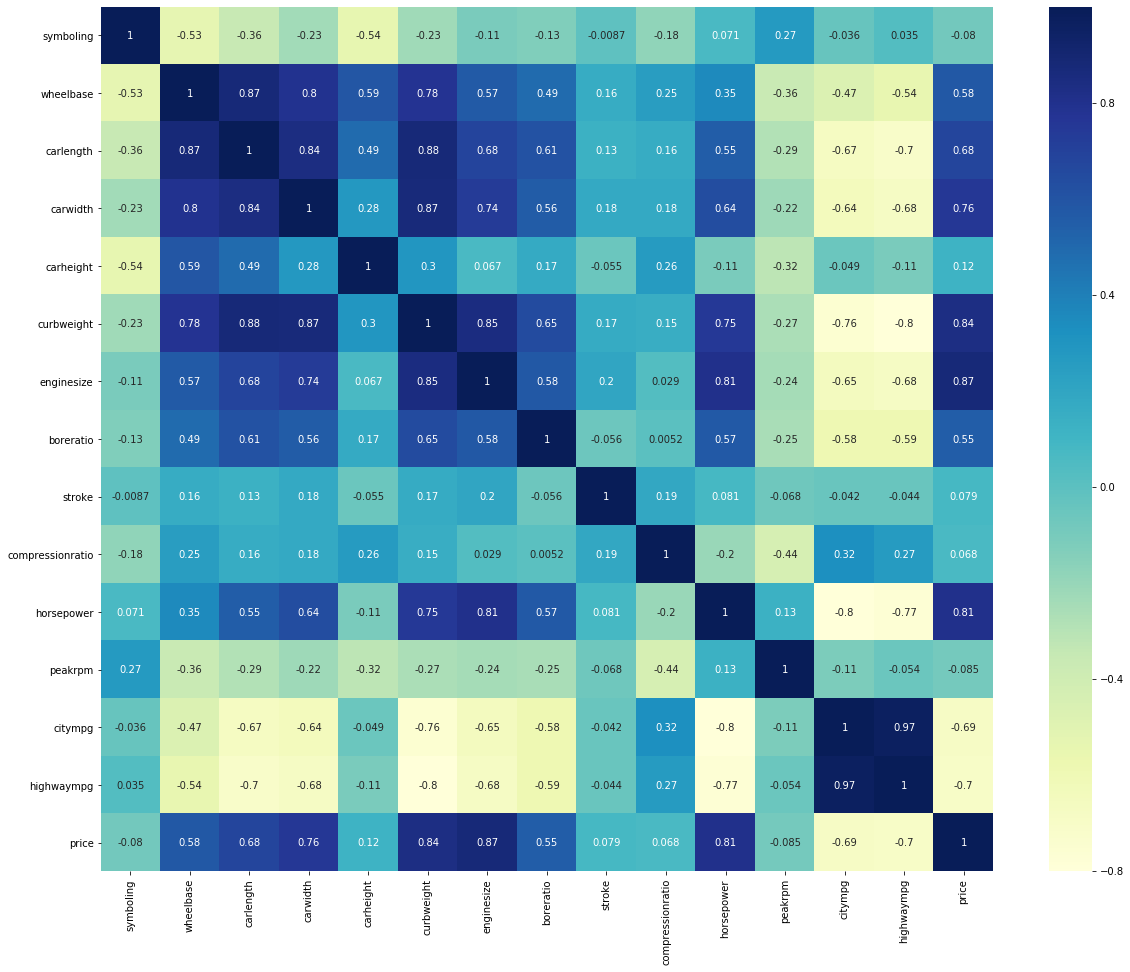

In [13]:
#Let's also plot the heat map to understand the correlation between different variables.
plt.figure(figsize = (20, 35))
plt.subplot(2, 1, 1)
ax = sns.heatmap(car_data.corr(), cmap="YlGnBu", annot = True)

#Facing some issue with heatmap
#Top and bottom part of the heatmap are cut-off
#After a quick research, concluded that this is library issue
#Refer: https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

From the heatmap and the pair plot we can have a basic understanding of collinearity of price with different variables. We can also conclude the collinearity among the other variables. However, let's just focus on price for now and we can focus on collinearity of the rest of the variables later in our analysis.

Now, we can see that there are both positive and negative relationship between price and other variables.
   - <b>Positive relationship</b>,
     - wheelbase
     - carlength
     - carwidth
     - curbweight
     - enginesize
     - boreratio
     - horsepower
   - <b>Negative relationship</b>
     - symboling
     - peakrpm
     - citympg
     - highwaympg
     
Price is <b>highly collinear</b> with below variables,
- wheelbase
- carlength
- carwidth
- curbweight
- enginesize
- boreratio
- horsepower

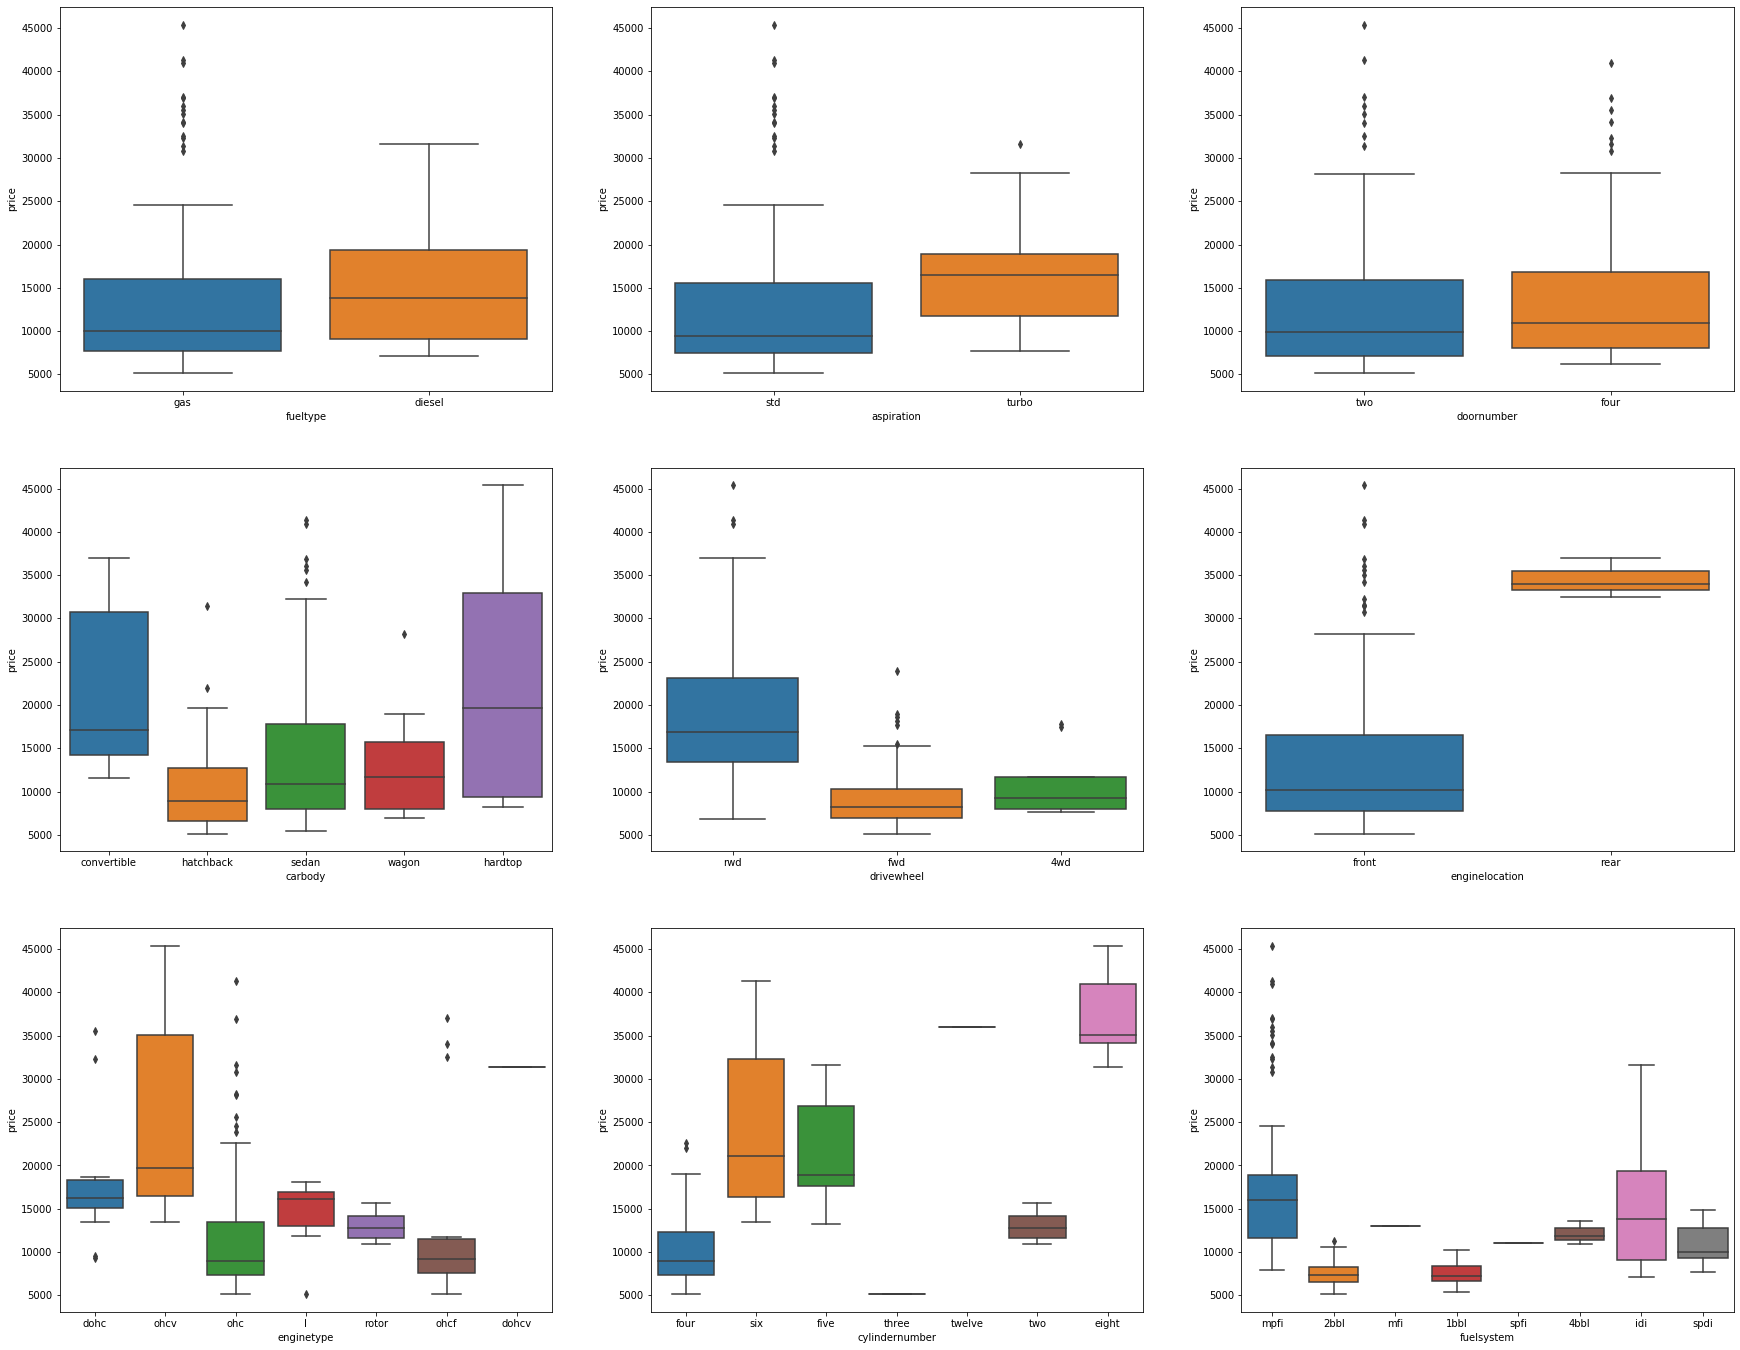

In [14]:
#Before we move on let's also under the relationship between the categorical values and price.
plt.figure(figsize=(30, 24))

plt.subplot(3,3,1)
sns.boxplot(x='fueltype', y = 'price', data = car_data)

plt.subplot(3, 3, 2)
sns.boxplot(x='aspiration', y = 'price', data = car_data)

plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = car_data)

plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = car_data)

plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_data)

plt.subplot(3,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_data)

plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = car_data)

plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_data)

plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_data)

plt.show()

From the boxplot above, we see that fueltype may have an impact on the price. We will have to confirm this later. Variables aspiration, cylindertype, enginetype and enginelocation clearly have an impact on the price.

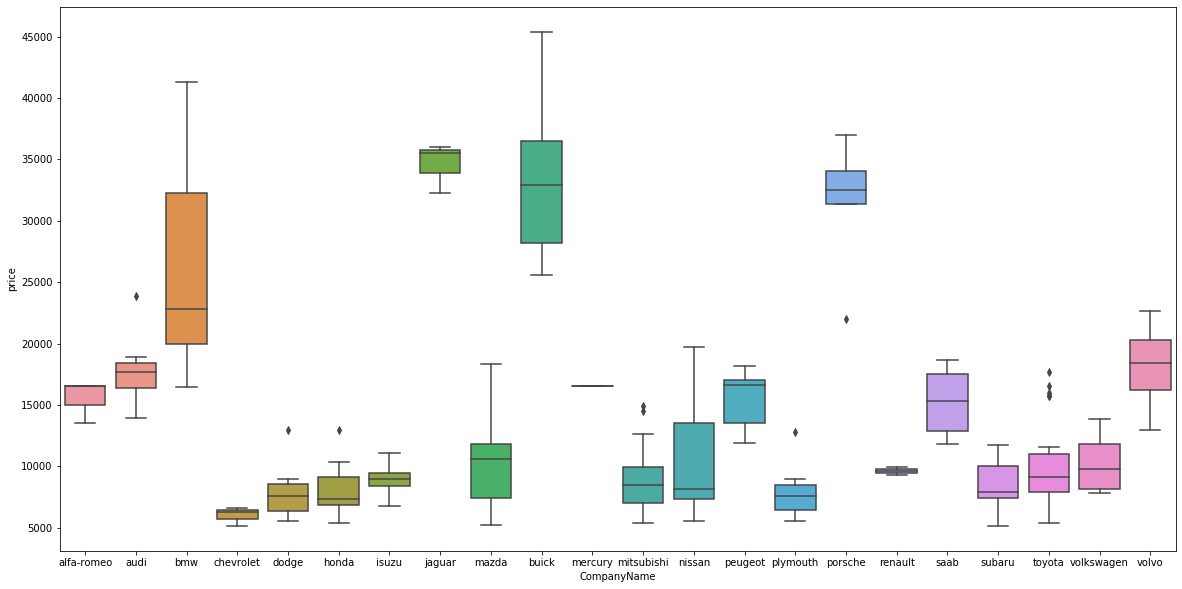

In [15]:
plt.figure(figsize = (20, 10))
sns.boxplot(x = 'CompanyName', y = 'price', data = car_data)
plt.show()

We see that different companies have different range in which they offer their cars which is expected. Some of the car manufactures produce cars like BMW, Jaguar, Buick, Porche and thus their 50th quartile is more than most of the companies. Some companies also show outliers, which may indicate that these companies produce the cars which they sell at a premium price. Example of such companies is saab, toyota etc. However, in case of porche we see that outliers lie below the 0th quartile which may indicate that they offer cheaper option as well.

### Outlier handling
We see that there are various outliers in the data. Let's handle those since outliers will affect the multi-regression.

['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


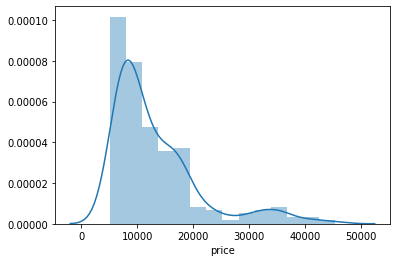

In [16]:
numeric_variables = list(car_data.columns[car_data.dtypes != 'object'])
print(numeric_variables)
plt.figure(figsize=(6,4))
sns.distplot(car_data['price'])
plt.show()

In [17]:
car_data= car_data[np.abs(car_data.price-car_data.price.mean()) <= (3*car_data.price.std())]
car_data.shape

(202, 25)

#### Creating new variables
We see from the heatmap that there is high correlation between some of the variables. We will use those variables and then try to create new metrics from it.

In [18]:
# len_by_width: Ratio of Length to Width
car_data['len_by_width'] = car_data.carlength/car_data.carwidth

# width_by_height: Ratio of Width to Height
car_data['width_by_height'] = car_data.carwidth/car_data.carheight

# pow_by_curbwt: Ratio of Power to Weight
car_data['pow_by_curbwt'] = car_data.horsepower/car_data.curbweight

# hmpg_by_cmpg: Ratio of Highway and city mileages
car_data['hmpg_by_cmpg'] = car_data.highwaympg/car_data.citympg

## droping the orignal variables
car_data.drop(['carlength','carwidth','carheight','highwaympg','citympg'],axis=1,inplace=True)
car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,...,stroke,compressionratio,horsepower,peakrpm,price,CompanyName,len_by_width,width_by_height,pow_by_curbwt,hmpg_by_cmpg
0,3,gas,std,two,convertible,rwd,front,88.6,2548,dohc,...,2.68,9.0,111,5000,13495.0,alfa-romeo,2.633385,1.313525,0.043564,1.285714
1,3,gas,std,two,convertible,rwd,front,88.6,2548,dohc,...,2.68,9.0,111,5000,16500.0,alfa-romeo,2.633385,1.313525,0.043564,1.285714
2,1,gas,std,two,hatchback,rwd,front,94.5,2823,ohcv,...,3.47,9.0,154,5000,16500.0,alfa-romeo,2.613740,1.250000,0.054552,1.368421
3,2,gas,std,four,sedan,fwd,front,99.8,2337,ohc,...,3.40,10.0,102,5500,13950.0,audi,2.667674,1.219153,0.043646,1.250000
4,2,gas,std,four,sedan,4wd,front,99.4,2824,ohc,...,3.40,8.0,115,5500,17450.0,audi,2.659639,1.222836,0.040722,1.222222


### 3. Data Preparation

If we do decide to add new variables, this is the point where we would add in future.

List of the categorical variable,
 - fueltype
 - aspiration
 - doornumber
 - carbody
 - drivewheel
 - enginelocation
 - enginetype
 - cylindernumber
 - fuelsystem
 
Let's get the unique values and then maps the values to numerical values.

In [19]:
#Getting all the unique values for each of the categorical variables.
print("Unique values in variable fueltype", car_data['fueltype'].unique())
print("Unique values in variable aspiration", car_data['aspiration'].unique())
print("Unique values in variable doornumber", car_data['doornumber'].unique())
print("Unique values in variable carbody", car_data['carbody'].unique())
print("Unique values in variable drivewheel", car_data['drivewheel'].unique())
print("Unique values in variable enginelocation", car_data['enginelocation'].unique())
print("Unique values in variable enginetype", car_data['enginetype'].unique())
print("Unique values in variable cylindernumber",car_data['cylindernumber'].unique())
print("Unique values in variable fuelsystem", car_data['fuelsystem'].unique())

Unique values in variable fueltype ['gas' 'diesel']
Unique values in variable aspiration ['std' 'turbo']
Unique values in variable doornumber ['two' 'four']
Unique values in variable carbody ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Unique values in variable drivewheel ['rwd' 'fwd' '4wd']
Unique values in variable enginelocation ['front' 'rear']
Unique values in variable enginetype ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Unique values in variable cylindernumber ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Unique values in variable fuelsystem ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


Variables with 2 levels,
 - fueltype 
 - aspiration 
 - doornumber 
 - enginelocation 
 
Variables with 3 levels,
 - drivewheel 
 
Variables with more than 3 levels,
 - carbody 
 - enginetype 
 - cylindernumber 
 - fuelsystem 

In [20]:
#Handling the categorial variables with 2 levels
car_data['fueltype'] = car_data['fueltype'].map({'gas': 1, 'diesel': 0})
car_data['aspiration'] = car_data['aspiration'].map({'std': 1, 'turbo': 0})
car_data['doornumber'] = car_data['doornumber'].map({'two': 1, 'four': 0})
car_data['enginelocation'] = car_data['enginelocation'].map({'front': 1, 'rear': 0})
car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,...,stroke,compressionratio,horsepower,peakrpm,price,CompanyName,len_by_width,width_by_height,pow_by_curbwt,hmpg_by_cmpg
0,3,1,1,1,convertible,rwd,1,88.6,2548,dohc,...,2.68,9.0,111,5000,13495.0,alfa-romeo,2.633385,1.313525,0.043564,1.285714
1,3,1,1,1,convertible,rwd,1,88.6,2548,dohc,...,2.68,9.0,111,5000,16500.0,alfa-romeo,2.633385,1.313525,0.043564,1.285714
2,1,1,1,1,hatchback,rwd,1,94.5,2823,ohcv,...,3.47,9.0,154,5000,16500.0,alfa-romeo,2.613740,1.250000,0.054552,1.368421
3,2,1,1,0,sedan,fwd,1,99.8,2337,ohc,...,3.40,10.0,102,5500,13950.0,audi,2.667674,1.219153,0.043646,1.250000
4,2,1,1,0,sedan,4wd,1,99.4,2824,ohc,...,3.40,8.0,115,5500,17450.0,audi,2.659639,1.222836,0.040722,1.222222


In [21]:
#We need to assign the dummy variables to the rest of the columns
car_data = pd.get_dummies(car_data, columns=['drivewheel','carbody', 'enginetype', 'cylindernumber', 'fuelsystem'],  drop_first = True)
car_data.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,1,1,1,88.6,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,1,1,1,1,88.6,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,1,94.5,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2,1,1,0,1,99.8,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,1,1,0,1,99.4,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [22]:
car_data.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'price', 'CompanyName',
       'len_by_width', 'width_by_height', 'pow_by_curbwt', 'hmpg_by_cmpg',
       'drivewheel_fwd', 'drivewheel_rwd', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

First thing to note here is that all the categorical values have been converted to numerical values. 
Before we move ahead let's do a column count for all the columns we have created dummy variables for. If the column has n level then n-1 columns should be present as we have used <b>drop_first=true</b>

<table>
    <tr>
        <td>Variable</td>
        <td>Level</td>
        <td>#Column created</td>
        <td>Columns</td>
    </tr>
    <tr>
        <td>drivewheel</td>
        <td>3</td>
        <td>2</td>
        <td>'drivewheel_fwd', 'drivewheel_rwd'</td>
    </tr>
    <tr>
        <td>carbody</td>
        <td>5</td>
        <td>4</td>
        <td>'carbody_hardtop','carbody_hatchback', 'carbody_sedan', 'carbody_wagon'</td>
    </tr>
    <tr>
        <td>enginetype</td>
        <td>7</td>
        <td>6</td>
        <td>'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf','enginetype_ohcv', 'enginetype_rotor'</td>
    </tr>
    <tr>
        <td>cylindernumber</td>
        <td>7</td>
        <td>6</td>
        <td>'cylindernumber_five','cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three','cylindernumber_twelve', 'cylindernumber_two'</td>
    </tr>
    <tr>
        <td>fuelsystem</td>
        <td>8</td>
        <td>7</td>
        <td>'fuelsystem_2bbl','fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi','fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'</td>
    </tr>
</table>    

In [23]:
#We need to also handle company name
#Let's first get the median of the company prices.

car_data.groupby('CompanyName').price.median().sort_values(ascending=False)

CompanyName
jaguar        35550.0
porsche       32528.0
buick         29924.0
bmw           21105.0
volvo         18420.0
audi          17710.0
peugeot       16630.0
mercury       16503.0
alfa-romeo    16500.0
saab          15275.0
mazda         10595.0
volkswagen     9737.5
renault        9595.0
toyota         9103.0
isuzu          8916.5
mitsubishi     8499.0
nissan         8124.0
subaru         7894.0
plymouth       7609.0
dodge          7609.0
honda          7295.0
chevrolet      6295.0
Name: price, dtype: float64

#### CompanyName
Before we move ahead we need to classify the companyname variable into three groups,
 - lowtier if company median price is below 10,000
 - midtier if company median price is above 10,000 and below 20,000
 - hightier if company median price is above 20,000

In [24]:
car_company_classification = {
    'chevrolet' : 'lowtier',
    'dodge' : 'lowtier',
    'plymouth' : 'lowtier',
    'honda' : 'lowtier',
    'subaru' : 'lowtier',
    'isuzu' : 'lowtier',
    'mitsubishi' : 'lowtier',
    'renault' : 'lowtier',
    'toyota' : 'lowtier',
    'volkswagen' : 'midtier',
    'nissan' : 'midtier',
    'mazda' : 'midtier',
    'saab' : 'midtier',
    'peugeot' : 'midtier',
    'alfa-romeo' : 'midtier',
    'mercury' : 'midtier',
    'audi' : 'midtier',
    'volvo' : 'midtier',
    'bmw' : 'hightier',
    'buick' : 'hightier',
    'porsche' : 'hightier',
    'jaguar' : 'hightier',
    }
car_data['CompanySegmented'] = car_data['CompanyName'].map(car_company_classification)
print(car_data[['CompanyName', 'CompanySegmented']])
# Dropping the orignal car_company variable
car_data.drop('CompanyName',axis=1,inplace=True)
print("Number of null values in CompanySegmented column = ",car_data['CompanySegmented'].isnull().sum())
car_data.head()

    CompanyName CompanySegmented
0    alfa-romeo          midtier
1    alfa-romeo          midtier
2    alfa-romeo          midtier
3          audi          midtier
4          audi          midtier
..          ...              ...
200       volvo          midtier
201       volvo          midtier
202       volvo          midtier
203       volvo          midtier
204       volvo          midtier

[202 rows x 2 columns]
Number of null values in CompanySegmented column =  0


,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CompanySegmented
0,3,1,1,1,1,88.6,2548,130,3.47,2.68,...,0,0,0,0,0,0,1,0,0,midtier
1,3,1,1,1,1,88.6,2548,130,3.47,2.68,...,0,0,0,0,0,0,1,0,0,midtier
2,1,1,1,1,1,94.5,2823,152,2.68,3.47,...,0,0,0,0,0,0,1,0,0,midtier
3,2,1,1,0,1,99.8,2337,109,3.19,3.40,...,0,0,0,0,0,0,1,0,0,midtier
4,2,1,1,0,1,99.4,2824,136,3.19,3.40,...,0,0,0,0,0,0,1,0,0,midtier


In [25]:
#Now let's get the dummies for the column 'CompanySegmented'
car_data = pd.get_dummies(car_data, columns=['CompanySegmented'],  drop_first = True)
car_data.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CompanySegmented_lowtier,CompanySegmented_midtier
0,3,1,1,1,1,88.6,2548,130,3.47,2.68,...,0,0,0,0,0,1,0,0,0,1
1,3,1,1,1,1,88.6,2548,130,3.47,2.68,...,0,0,0,0,0,1,0,0,0,1
2,1,1,1,1,1,94.5,2823,152,2.68,3.47,...,0,0,0,0,0,1,0,0,0,1
3,2,1,1,0,1,99.8,2337,109,3.19,3.40,...,0,0,0,0,0,1,0,0,0,1
4,2,1,1,0,1,99.4,2824,136,3.19,3.40,...,0,0,0,0,0,1,0,0,0,1


## 4. Model Building
Let's start building the model from here. We are going to build it using RFE for all the variables and then drop the variables on the basis of the analysis.
Before we start the actual building, we are going to divide the dataset into the trained and test dataset and also then scale the dataset.

In [26]:
#We are going to divide the entire dataset into 70-30 ratio

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(car_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [27]:
#Initializing the scaler class
scaler = MinMaxScaler()

Let's first get the list of the columns which need to be scaled.
 - wheelbase
 - curbweight
 - enginesize
 - boreratio
 - stroke
 - compressionratio
 - horsepower
 - peakrpm
 - price
 - len_by_width
 - width_by_height
 - pow_by_curbwt
 - hmpg_by_cmpg

In [28]:
variables_scaled = ['wheelbase','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','price','len_by_width','width_by_height','pow_by_curbwt','hmpg_by_cmpg']

#Since it is train part hence we will use fit_transform
#Only transform will be used in test part
df_train[variables_scaled] = scaler.fit_transform(df_train[variables_scaled])

df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CompanySegmented_lowtier,CompanySegmented_midtier
1,3,1,1,1,1,0.068966,0.411171,0.260377,0.664286,0.290476,...,0,0,0,0,0,1,0,0,0,1
165,1,1,1,1,1,0.272414,0.301396,0.139623,0.500000,0.480952,...,0,0,0,0,0,1,0,0,1,0
197,-1,1,1,0,1,0.610345,0.602793,0.301887,0.885714,0.514286,...,0,0,0,0,0,1,0,0,0,1
169,2,1,1,1,1,0.406897,0.412335,0.320755,0.771429,0.680952,...,0,0,0,0,0,1,0,0,1,0
190,3,1,1,1,1,0.272414,0.284329,0.181132,0.464286,0.633333,...,0,0,0,0,0,1,0,0,0,1


This turned out well. All the above variables have now been scaled. To verify, let's describe the train dataform

In [29]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,141.0,0.851064,1.230193,-2.0,0.000000,1.000000,2.000000,3.0
fueltype,141.0,0.886525,0.318304,0.0,1.000000,1.000000,1.000000,1.0
aspiration,141.0,0.794326,0.405634,0.0,1.000000,1.000000,1.000000,1.0
doornumber,141.0,0.439716,0.498122,0.0,0.000000,0.000000,1.000000,1.0
enginelocation,141.0,0.985816,0.118672,0.0,1.000000,1.000000,1.000000,1.0
wheelbase,141.0,0.413402,0.198892,0.0,0.272414,0.358621,0.503448,1.0
curbweight,141.0,0.411779,0.198452,0.0,0.254849,0.359193,0.552366,1.0
enginesize,141.0,0.240894,0.146364,0.0,0.135849,0.188679,0.301887,1.0
boreratio,141.0,0.559980,0.192528,0.0,0.421429,0.550000,0.742857,1.0
stroke,141.0,0.551570,0.150278,0.0,0.490476,0.571429,0.633333,1.0


If you observed the scaled variables, we have max value as 1 and min value as 0. Thus all of the above values have been scaled. 

#### Dividing the train dataset into X_train and y_train 

In [30]:
y_train = df_train.pop('price')
X_train = df_train

In [31]:
y_train.head()

1      0.358353
165    0.131604
197    0.358825
169    0.153359
190    0.153076
Name: price, dtype: float64

In [32]:
X_train.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'len_by_width',
       'width_by_height', 'pow_by_curbwt', 'hmpg_by_cmpg', 'drivewheel_fwd',
       'drivewheel_rwd', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'CompanySegmented_lowtier',
       'CompanySegmented_midtier'],
      dtype='object')

### Model1
As mentioned above, we will first try RFE (available through sklearn) and then analyze the results with statmodel. 

#### RFE

In [33]:
lm = LinearRegression()
lm.fit(X_train, y_train)

#We will pick 15 variables for our analysis. 10 will be too less.
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [34]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('symboling', False, 28),
 ('fueltype', False, 6),
 ('aspiration', False, 9),
 ('doornumber', False, 24),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('curbweight', False, 14),
 ('enginesize', False, 8),
 ('boreratio', False, 4),
 ('stroke', False, 5),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', False, 3),
 ('len_by_width', True, 1),
 ('width_by_height', True, 1),
 ('pow_by_curbwt', True, 1),
 ('hmpg_by_cmpg', False, 23),
 ('drivewheel_fwd', False, 29),
 ('drivewheel_rwd', False, 25),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', False, 2),
 ('carbody_wagon', True, 1),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 15),
 ('enginetype_ohc', False, 27),
 ('enginetype_ohcf', False, 26),
 ('enginetype_ohcv', False, 7),
 ('enginetype_rotor', False, 19),
 ('cylindernumber_five', False, 12),
 ('cylindernumber_four', False, 10),
 ('cylindernumber_six', False, 11),
 ('cylindernumber_three', False, 16),
 ('cyl

In [35]:
columns_included = X_train.columns[rfe.support_]
columns_included

Index(['enginelocation', 'wheelbase', 'compressionratio', 'horsepower',
       'len_by_width', 'width_by_height', 'pow_by_curbwt', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_wagon', 'enginetype_dohcv',
       'cylindernumber_twelve', 'fuelsystem_idi', 'CompanySegmented_lowtier',
       'CompanySegmented_midtier'],
      dtype='object')

From above, we have got the 15 columns that we included in the RFE.

In [36]:
X_train.columns[~rfe.support_]
#These are the columns which were not included

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'peakrpm', 'hmpg_by_cmpg',
       'drivewheel_fwd', 'drivewheel_rwd', 'carbody_sedan', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_two',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [37]:
#In statmodel lib we need to add constant before we start regression
X_train_rfe = X_train[columns_included]
X_train_lm = X_train_rfe
X_train_lm = sm.add_constant(X_train_lm)

In [38]:
lr_model1 = sm.OLS(y_train,X_train_lm).fit()

In [39]:
print(lr_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     164.1
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           1.55e-74
Time:                        09:39:01   Log-Likelihood:                 221.69
No. Observations:                 141   AIC:                            -411.4
Df Residuals:                     125   BIC:                            -364.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [40]:
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,293.94
3,compressionratio,59.22
13,fuelsystem_idi,59.04
4,horsepower,24.29
7,pow_by_curbwt,18.29
14,CompanySegmented_lowtier,6.03
15,CompanySegmented_midtier,5.04
2,wheelbase,4.00
5,len_by_width,3.70
6,width_by_height,2.61


### Dropping the variables
We see that horsepower has high p-value and also high VIF. So let's drop this variable first and then hopefully the VIF of the rest of the variables will drop.

In [41]:
X_train_lm = X_train_lm.drop('carbody_hardtop', axis=1)

In [42]:
X_train_lm.columns

Index(['const', 'enginelocation', 'wheelbase', 'compressionratio',
       'horsepower', 'len_by_width', 'width_by_height', 'pow_by_curbwt',
       'carbody_hatchback', 'carbody_wagon', 'enginetype_dohcv',
       'cylindernumber_twelve', 'fuelsystem_idi', 'CompanySegmented_lowtier',
       'CompanySegmented_midtier'],
      dtype='object')

Let's build the model again and check

In [43]:
X_train_lm = sm.add_constant(X_train_lm)
lr_model2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     175.7
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           1.94e-75
Time:                        09:39:01   Log-Likelihood:                 221.09
No. Observations:                 141   AIC:                            -412.2
Df Residuals:                     126   BIC:                            -367.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [44]:
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,246.62
3,compressionratio,59.06
12,fuelsystem_idi,58.94
4,horsepower,24.29
7,pow_by_curbwt,18.29
13,CompanySegmented_lowtier,5.99
14,CompanySegmented_midtier,5.00
2,wheelbase,4.00
5,len_by_width,3.69
6,width_by_height,2.60


### Dropping the variables
We see that cylindernumber_twelve has high p-value and also low VIF. So let's drop this variable first and then hopefully the VIF of the rest of the variables will drop.

In [45]:
X_train_lm = X_train_lm.drop('carbody_wagon', axis=1)

In [46]:
X_train_lm.columns

Index(['const', 'enginelocation', 'wheelbase', 'compressionratio',
       'horsepower', 'len_by_width', 'width_by_height', 'pow_by_curbwt',
       'carbody_hatchback', 'enginetype_dohcv', 'cylindernumber_twelve',
       'fuelsystem_idi', 'CompanySegmented_lowtier',
       'CompanySegmented_midtier'],
      dtype='object')

In [47]:
X_train_lm = sm.add_constant(X_train_lm)
lr_model2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     188.5
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           2.73e-76
Time:                        09:39:01   Log-Likelihood:                 220.32
No. Observations:                 141   AIC:                            -412.6
Df Residuals:                     127   BIC:                            -371.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [48]:
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,239.60
3,compressionratio,58.84
11,fuelsystem_idi,58.83
4,horsepower,23.44
7,pow_by_curbwt,17.47
12,CompanySegmented_lowtier,5.78
13,CompanySegmented_midtier,4.95
2,wheelbase,3.98
5,len_by_width,3.66
6,width_by_height,2.37


### Dropping the variables
We see that p value of most of the variables are less than 0.05 so we are good there. However, we see that there a variables with very high VIF which is not acceptable. Threshold that we have selected for this is 5.00. Anything above that has to be removed. Let's drop variables with high VIF and hopefully VIF of the rest of the variables will reduce.

In [49]:
X_train_lm = X_train_lm.drop('compressionratio', axis=1)

In [50]:
X_train_lm.columns

Index(['const', 'enginelocation', 'wheelbase', 'horsepower', 'len_by_width',
       'width_by_height', 'pow_by_curbwt', 'carbody_hatchback',
       'enginetype_dohcv', 'cylindernumber_twelve', 'fuelsystem_idi',
       'CompanySegmented_lowtier', 'CompanySegmented_midtier'],
      dtype='object')

In [51]:
X_train_lm = sm.add_constant(X_train_lm)
lr_model3 = sm.OLS(y_train, X_train_lm).fit()
print(lr_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     198.4
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           1.69e-76
Time:                        09:39:01   Log-Likelihood:                 217.88
No. Observations:                 141   AIC:                            -409.8
Df Residuals:                     128   BIC:                            -371.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [52]:
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,200.63
3,horsepower,21.93
6,pow_by_curbwt,17.29
11,CompanySegmented_lowtier,5.67
12,CompanySegmented_midtier,4.93
2,wheelbase,3.93
4,len_by_width,3.59
5,width_by_height,2.37
1,enginelocation,1.90
10,fuelsystem_idi,1.78


### Dropping the variables
On dropping the variable we see that p-value of variable fuelsystem_idi is more than 0.05. So let's drop the variable.

In [53]:
X_train_lm = X_train_lm.drop('fuelsystem_idi', axis=1)

In [54]:
X_train_lm.columns

Index(['const', 'enginelocation', 'wheelbase', 'horsepower', 'len_by_width',
       'width_by_height', 'pow_by_curbwt', 'carbody_hatchback',
       'enginetype_dohcv', 'cylindernumber_twelve', 'CompanySegmented_lowtier',
       'CompanySegmented_midtier'],
      dtype='object')

In [55]:
X_train_lm = sm.add_constant(X_train_lm)
lr_model4 = sm.OLS(y_train, X_train_lm).fit()
print(lr_model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     213.7
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           3.96e-77
Time:                        09:39:01   Log-Likelihood:                 216.49
No. Observations:                 141   AIC:                            -409.0
Df Residuals:                     129   BIC:                            -373.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [56]:
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,164.84
3,horsepower,20.90
6,pow_by_curbwt,14.31
10,CompanySegmented_lowtier,5.67
11,CompanySegmented_midtier,4.90
2,wheelbase,3.85
4,len_by_width,3.45
5,width_by_height,2.32
1,enginelocation,1.74
7,carbody_hatchback,1.56


### Dropping the variables
We see that p value of most of the variables are less than 0.05 so we are good there. However, we see that there a variables with very high VIF which is not acceptable. Threshold that we have selected for this is 5.00. Let's drop horsepower and hopefully with that VIF of the rest of the variables will decrease.

#### Note: I had dropped horsepower variable since it had high VIF of 20.90. However, when the variable was dropped the overall rsq of the model decreased from 0.948 to 0.89. Instead, I dropped pow_by_curbwt having VIF of 14.31 which dropped the overall rsq of the model from 0.948 to 0.925 and the VIF of horsepower dropped significantly, so that's awesome!

In [57]:
X_train_lm = X_train_lm.drop('pow_by_curbwt', axis=1)

In [58]:
X_train_lm.columns

Index(['const', 'enginelocation', 'wheelbase', 'horsepower', 'len_by_width',
       'width_by_height', 'carbody_hatchback', 'enginetype_dohcv',
       'cylindernumber_twelve', 'CompanySegmented_lowtier',
       'CompanySegmented_midtier'],
      dtype='object')

In [59]:
X_train_lm = sm.add_constant(X_train_lm)
lr_model5 = sm.OLS(y_train, X_train_lm).fit()
print(lr_model5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     160.9
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           3.95e-68
Time:                        09:39:01   Log-Likelihood:                 190.92
No. Observations:                 141   AIC:                            -359.8
Df Residuals:                     130   BIC:                            -327.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [60]:
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,113.40
9,CompanySegmented_lowtier,5.31
10,CompanySegmented_midtier,4.56
3,horsepower,3.88
4,len_by_width,3.22
2,wheelbase,2.73
5,width_by_height,2.29
1,enginelocation,1.67
6,carbody_hatchback,1.56
7,enginetype_dohcv,1.50


### Dropping the variables
On dropping the variable we see that p-value of variable len_by_width is more than 0.05. So let's drop the variable.

In [61]:
X_train_lm = X_train_lm.drop('len_by_width', axis=1)

In [62]:
X_train_lm.columns

Index(['const', 'enginelocation', 'wheelbase', 'horsepower', 'width_by_height',
       'carbody_hatchback', 'enginetype_dohcv', 'cylindernumber_twelve',
       'CompanySegmented_lowtier', 'CompanySegmented_midtier'],
      dtype='object')

In [63]:
X_train_lm = sm.add_constant(X_train_lm)
lr_model6 = sm.OLS(y_train, X_train_lm).fit()
print(lr_model6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     176.8
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           8.68e-69
Time:                        09:39:01   Log-Likelihood:                 189.72
No. Observations:                 141   AIC:                            -359.4
Df Residuals:                     131   BIC:                            -329.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [64]:
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,105.65
8,CompanySegmented_lowtier,5.29
9,CompanySegmented_midtier,4.42
3,horsepower,3.40
4,width_by_height,2.18
2,wheelbase,1.83
1,enginelocation,1.67
5,carbody_hatchback,1.40
6,enginetype_dohcv,1.37
7,cylindernumber_twelve,1.30


### Dropping the variables
On dropping the variable we see that p-value of variable cylindernumber_twelve is more than 0.05. So let's drop the variable.

In [65]:
X_train_lm = X_train_lm.drop('cylindernumber_twelve', axis=1)

In [66]:
X_train_lm.columns

Index(['const', 'enginelocation', 'wheelbase', 'horsepower', 'width_by_height',
       'carbody_hatchback', 'enginetype_dohcv', 'CompanySegmented_lowtier',
       'CompanySegmented_midtier'],
      dtype='object')

In [67]:
X_train_lm = sm.add_constant(X_train_lm)
lr_model6 = sm.OLS(y_train, X_train_lm).fit()
print(lr_model6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     196.4
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           2.05e-69
Time:                        09:39:01   Log-Likelihood:                 188.39
No. Observations:                 141   AIC:                            -358.8
Df Residuals:                     132   BIC:                            -332.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [68]:
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,100.65
7,CompanySegmented_lowtier,5.22
8,CompanySegmented_midtier,4.33
3,horsepower,3.21
4,width_by_height,2.14
2,wheelbase,1.78
1,enginelocation,1.59
5,carbody_hatchback,1.37
6,enginetype_dohcv,1.30


### Note:

I tried dropping CompanySegmented_lowtier variables since it has VIF a bit more than 5 however then the overall Rsq of the model dropped from 0.922 to 0.83 which is a significant drop.

Now the VIF of CompanySegmented_lowtier is only a bit higher than 5 (i.e <b>0.22</b>) so let's not drop the variable since this is a good model as there is no difference between Rsq and Adjusted Rsq.

In [69]:
lr_model6.params

const                       0.406615
enginelocation             -0.191738
wheelbase                   0.304273
horsepower                  0.532798
width_by_height             0.210903
carbody_hatchback          -0.032080
enginetype_dohcv           -0.198987
CompanySegmented_lowtier   -0.348180
CompanySegmented_midtier   -0.288679
dtype: float64

### Model 6 
Model 6 seems like a good model since all the p-values are less and the difference between Rsq and Adjusted-Rsq is very less.

Variables and coefficients are as follows,
<table>
    <tr>
        <td>const</td>
        <td>0.406615</td>
    </tr>
    <tr>
        <td>enginelocation</td>
        <td>-0.191738</td>
    </tr>
    <tr>
        <td>wheelbase</td>
        <td>0.304273</td>
    </tr>
    <tr>
        <td>horsepower</td>
        <td>0.532798</td>
    </tr>
    <tr>
        <td>width_by_height</td>
        <td>0.210903</td>
    </tr>
    <tr>
        <td>carbody_hatchback</td>
        <td>-0.032080</td>
    </tr>
    <tr>
        <td>enginetype_dohcv</td>
        <td>-0.198987</td>
    </tr>
    <tr>
        <td>CompanySegmented_lowtier</td>
        <td>-0.348180</td>
    </tr>
    <tr>
        <td>CompanySegmented_midtier</td>
        <td>-0.288679</td>
    </tr>
</table>


<table>
    <tr>
        <td>R-squared</td>
        <td>0.922</td>
    </tr>
    <tr>
        <td>Adj. R-squared</td>
        <td>0.918</td>
    </tr>
    <tr>
        <td>F-statistic</td>
        <td>196.4</td>
    </tr>
    <tr>
        <td>Prob (F-statistic)</td>
        <td>2.05e-69</td>
    </tr>
    <tr>
        <td>Log-Likelihood</td>
        <td>188.39</td>
    </tr>
    <tr>
        <td>AIC</td>
        <td>-358.8</td>
    </tr>
    <tr>
        <td>BIC</td>
        <td>-332.2</td>
    </tr>
</table>



### Residual Analysis
Let's perform Residual analysis and see if the error terms are normally distributed. 

In [70]:
y_train_lm = lr_model6.predict(X_train_lm)

Text(0.5, 0, 'Errors')

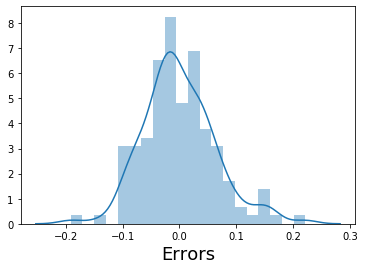

In [72]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_lm), bins = 20)              
plt.xlabel('Errors', fontsize = 18) 

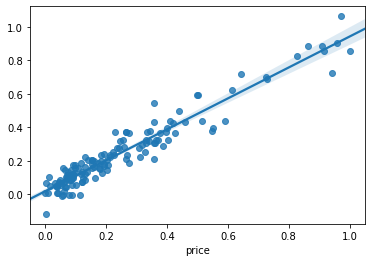

In [73]:
sns.regplot(y_train, y_train_lm)
plt.show()

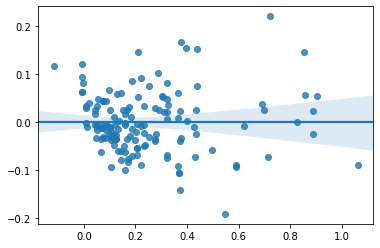

In [74]:
fig = plt.figure()
sns.regplot(y_train_lm, (y_train-y_train_lm))
plt.show()

We see that error is normally distributed. And also there is no visible pattern observed in the error. Thus all the assumptions related to the regression model can be confirmed to be true.

### Making Predictions about the test dataset

In [76]:
#These variables were scaled in the train dataset and the same should be scaled here as well
variables_scaled

['wheelbase',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'price',
 'len_by_width',
 'width_by_height',
 'pow_by_curbwt',
 'hmpg_by_cmpg']

In [77]:
#We are only going to transform and not fit
df_test[variables_scaled] = scaler.transform(df_test[variables_scaled])

In [78]:
#Dividing the test dataset between X and y
y_test = df_test.pop('price')
X_test = df_test

In [79]:
X_train_lm= X_train_lm.drop(['const'], axis=1)
X_test_lm = X_test[X_train_lm.columns]

# Adding a constant variable because we have to do that in statmodel api 
X_test_lm = sm.add_constant(X_test_lm)

In [81]:
#Predicting the value of price using the model
y_pred = lr_model6.predict(X_test_lm)

### Model Evaluation

Text(0, 0.5, 'y_pred')

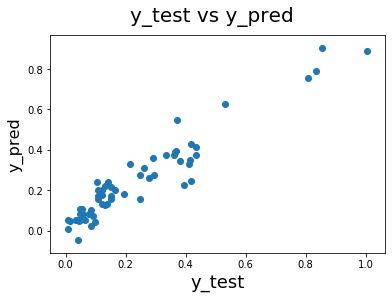

In [82]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                      

We see the spread of the difference between y_test and y_pred is linear.

In [87]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

0.06566970980653972

In [89]:
r2=r2_score(y_test, y_pred)
r2

0.9104014258296247

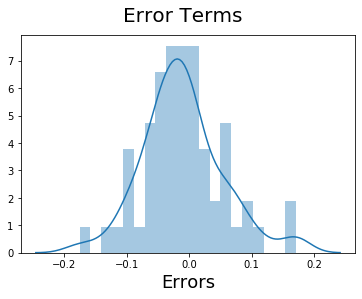

In [90]:
#Let's peform residual analysis
fig = plt.figure()
sns.distplot((y_test-y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)               
plt.xlabel('Errors', fontsize = 18)                     
plt.show()

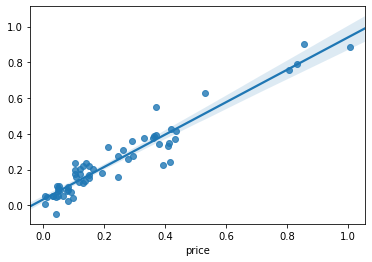

In [92]:
sns.regplot(y_test, y_pred)
plt.show()

### Conclusion


Model 6 seems like a good model, since it has a high $r^2$ and $Ajusted-r^2$ value. In the training dataset we observe the following statistics, <br>
$r^2 = 0.922$ and $Adjusted-r^2 = 0.918.$</p>

##### General question of Multi-linear regression
$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots$

From the analysis, we derive the below equation,

$y = 0.406615 - 0.191738 * enginelocation + 0.304273 * wheelbase + 0.532798 * horsepower + 0.210903 * width\_by\_height - 0.032080 * carbody\_hatchback - 0.198987 * enginetype\_dohcv - 0.348180 * CompanySegmented\_lowtier - 0.288679 * CompanySegmented\_midtier$

Variables and coefficients are as follows,
<table>
    <tr>
        <th>Variable Description</th>
        <th>Variable Name</th>
        <th>Coefficient</th>
    </tr>
    <tr>
        <td>Constant</td>
        <td>const</td>
        <td>0.406615</td>
    </tr>
    <tr>
        <td>Location of car engine</td>
        <td>enginelocation</td>
        <td>-0.191738</td>
    </tr>
    <tr>
        <td>Weelbase of car </td>
        <td>wheelbase</td>
        <td>0.304273</td>
    </tr>
    <tr>
        <td>Horsepower</td>
        <td>horsepower</td>
        <td>0.532798</td>
    </tr>
    <tr>
        <td>Derived metric: Width by Height</td>
        <td>width_by_height</td>
        <td>0.210903</td>
    </tr>
    <tr>
        <td>Body of car</td>
        <td>carbody_hatchback</td>
        <td>-0.032080</td>
    </tr>
    <tr>
        <td>Type of engine</td>
        <td>enginetype_dohcv</td>
        <td>-0.198987</td>
    </tr>
    <tr>
        <td>Company segmented (Low tier)</td>
        <td>CompanySegmented_lowtier</td>
        <td>-0.348180</td>
    </tr>
    <tr>
        <td>Company segmented (Mid tier)</td>
        <td>CompanySegmented_midtier</td>
        <td>-0.288679</td>
    </tr>
</table>

<table>
    <tr>
        <td>R-squared</td>
        <td>0.922</td>
    </tr>
    <tr>
        <td>Adj. R-squared</td>
        <td>0.918</td>
    </tr>
    <tr>
        <td>F-statistic</td>
        <td>196.4</td>
    </tr>
    <tr>
        <td>Prob (F-statistic)</td>
        <td>2.05e-69</td>
    </tr>
    <tr>
        <td>Log-Likelihood</td>
        <td>188.39</td>
    </tr>
    <tr>
        <td>AIC</td>
        <td>-358.8</td>
    </tr>
    <tr>
        <td>BIC</td>
        <td>-332.2</td>
    </tr>
</table>